In [27]:
# Used for Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Used for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

# Used for NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer





C:\Users\shinj\AppData\Local\Temp\ipykernel_65996\661227056.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [28]:
!pip install catboost
!pip install --upgrade tensorflow

In [29]:
#from google.colab import drive

#drive.mount('/content/drive')

In [30]:
 #!pip install tensorflow==2.11.0
 #import tensorflow as tf
#!pip install catboost

In [1]:
# Used for ML/Deep Learning Algorithms
#!pip install tensorflow
#import tensorflow.keras
#from tensorflow import keras
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional,GRU,MaxPooling1D,Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

train = pd.read_csv('fake_train.csv')
test  = pd.read_csv('fake_test.csv')
train.head()

ModuleNotFoundError: No module named 'tensorflow.keras'

analyzing test data

In [8]:
test.head()
test.dtypes
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

count the number of rows and columns in training and testing data

In [9]:
print("There are {} rows and {} columns in training data".format(train.shape[0],train.shape[1]))
print("There are {} rows and {} columns in testing data".format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in training data
There are 3263 rows and 4 columns in testing data


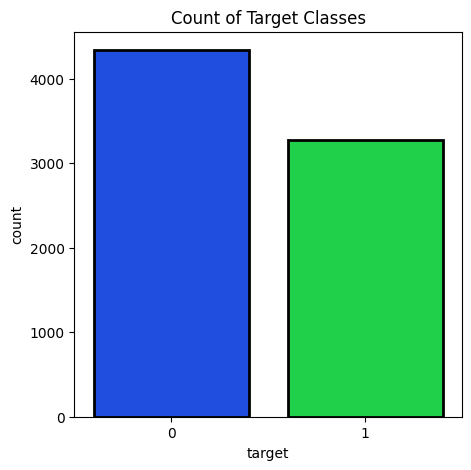

In [10]:
plt.figure(figsize=(5,5))
plt.title("Count of Target Classes")
sns.countplot(x=train["target"],linewidth=2, edgecolor='black')
plt.show()


analysing total number of characters in text.

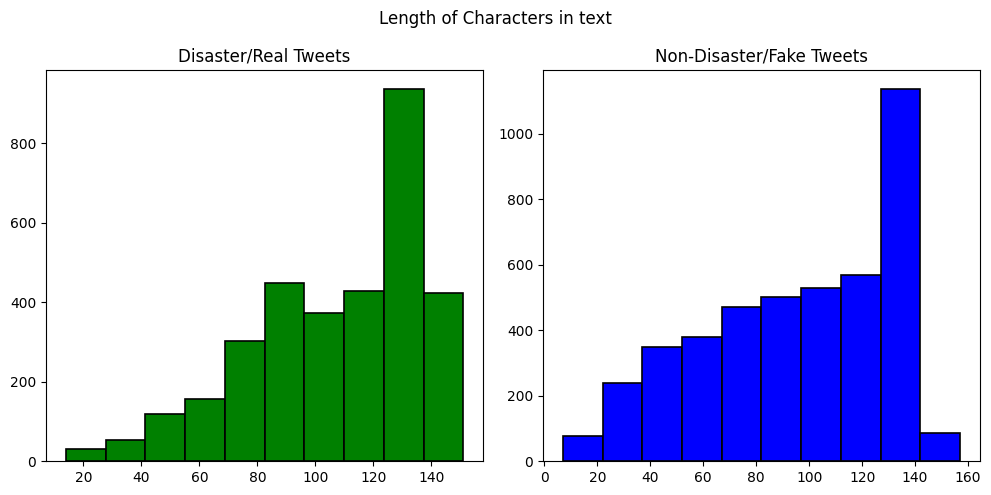

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.len()
ax1.hist(char_len_dis,color='green',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster/Real Tweets')

char_len_ndis = train[train['target']==0]['text'].str.len()
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster/Fake Tweets')
plt.suptitle("Length of Characters in text")
plt.tight_layout()
plt.show()

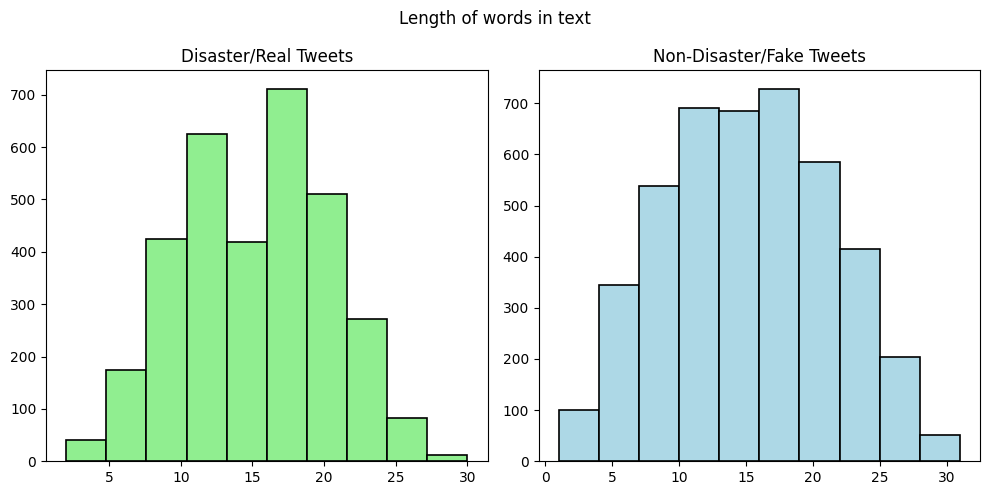

In [12]:
# Analysing number of words in text.

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(char_len_dis,color='lightgreen',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster/Real Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(char_len_ndis,color='lightblue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster/Fake Tweets')
plt.suptitle("Length of words in text")
plt.tight_layout()
plt.show()

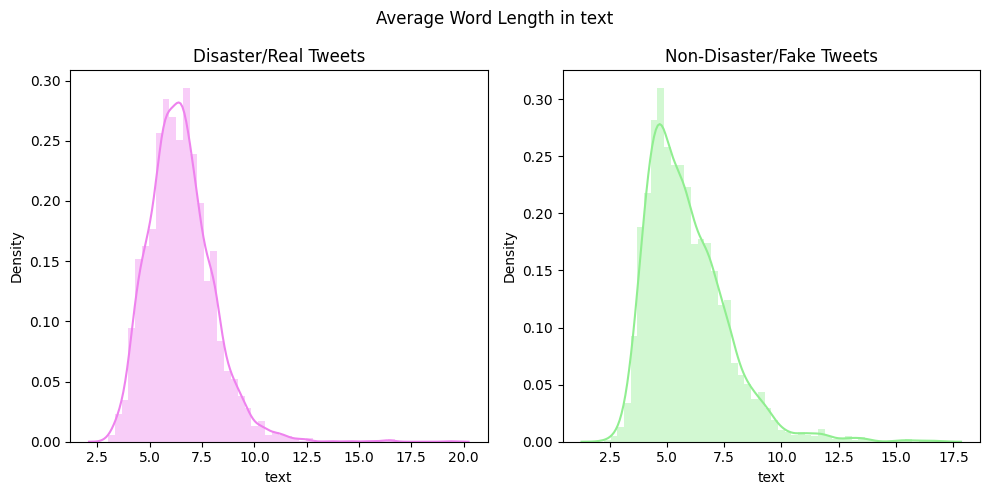

In [13]:
# Analysing average word length in text.

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_dis.map(lambda x: np.mean(x)),ax=ax1,color='violet')
ax1.set_title('Disaster/Real Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_ndis.map(lambda x: np.mean(x)),ax=ax2,color='lightgreen')
ax2.set_title('Non-Disaster/Fake Tweets')
plt.suptitle("Average Word Length in text")
plt.tight_layout()
plt.show()


1. Stop Words Analysis
2. Punctuations Analysis
3. Analysis of Missing words.

In [14]:
# Creating sample corpus for further analysis.
def create_corpus(target):
    corpus = []
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

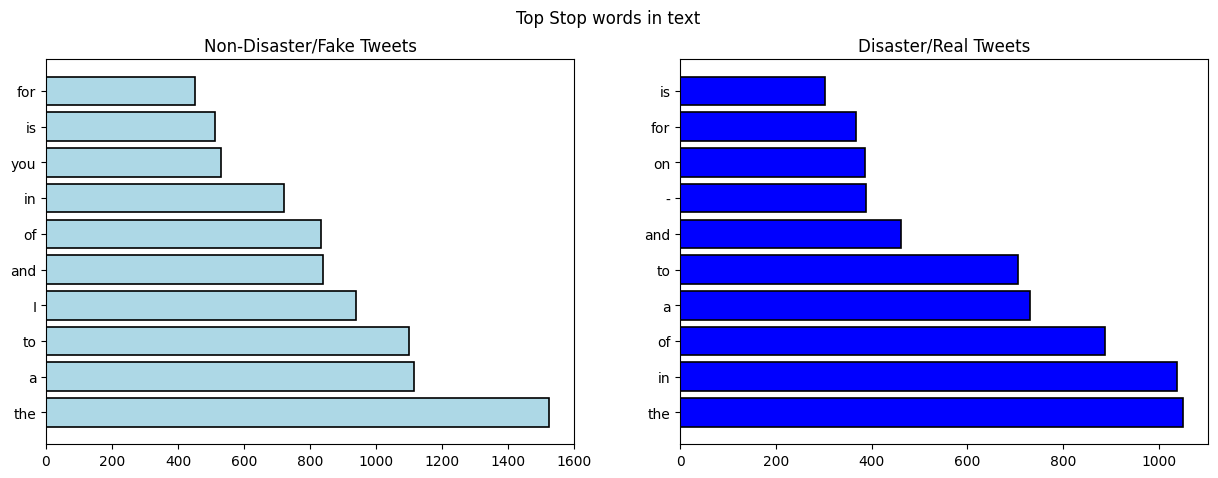

In [15]:
# Analysing top stop words in text.
from collections import defaultdict

def analyze_stopwords(data,func,target):
    values_list = []
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for word in corpus:
            dic[word]+=1
        top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
        x_items,y_values = zip(*top)
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.barh(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster/Fake Tweets")
    
    ax2.barh(values_list[2],values_list[3],color="blue",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster/Real Tweets")
            
    plt.suptitle("Top Stop words in text")
    plt.show()

analyze_stopwords(train,create_corpus,[0,1])

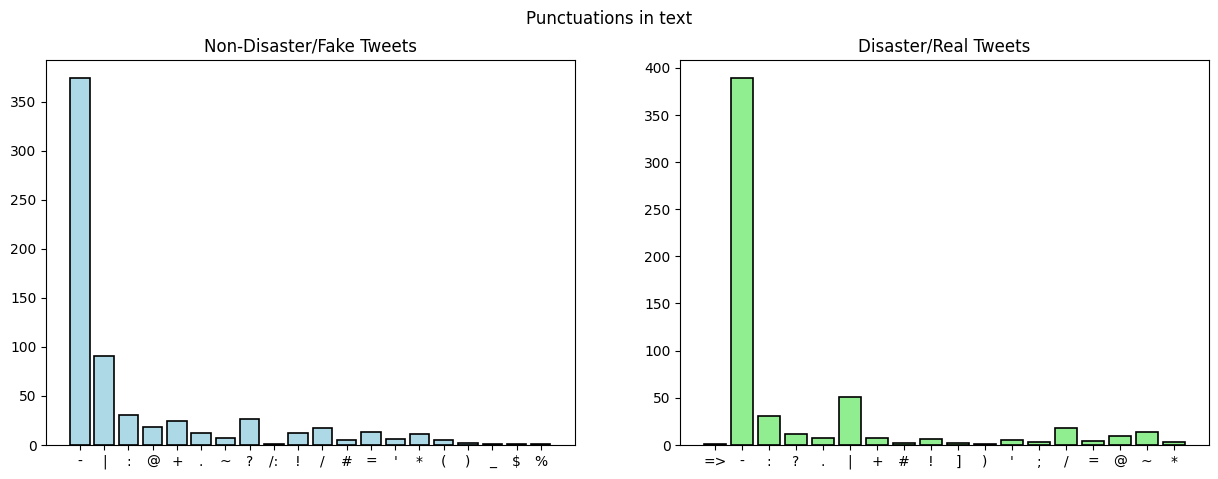

In [16]:
# Anaysing Punctuations
import string

def analyze_punctuation(data,func,target):
    values_list = []
    special = string.punctuation
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for i in corpus:
            if i in special:
                dic[i]+=1
        x_items,y_values = zip(*dic.items())
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster/Fake Tweets")
    
    ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster/Real Tweets")
            
    plt.suptitle("Punctuations in text")
    plt.show()

analyze_punctuation(train,create_corpus,[0,1])


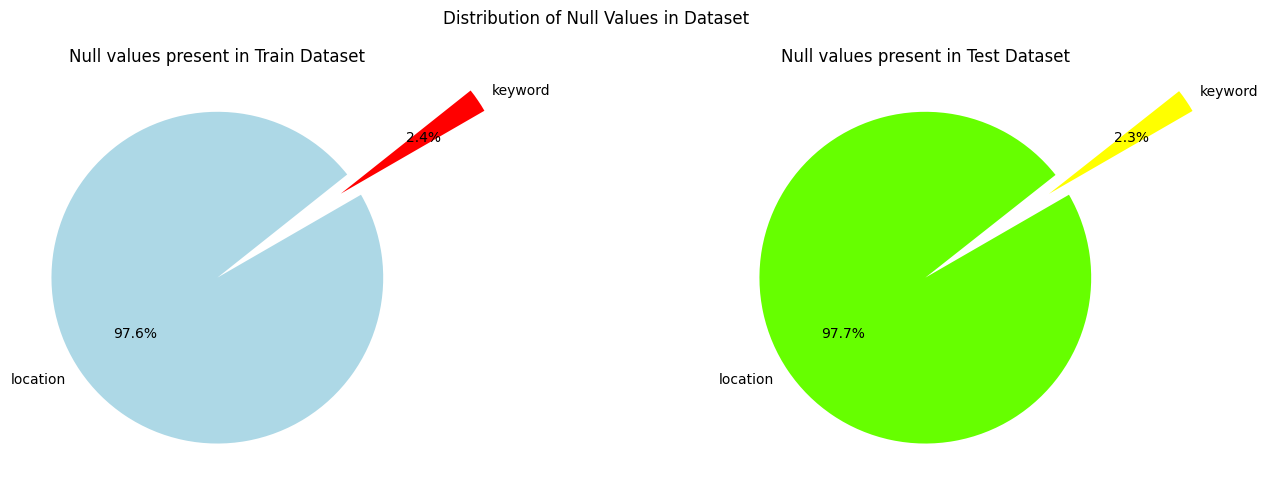

In [17]:
# Checking Null values
missing_train = train.isnull().sum()  
missing_test = test.isnull().sum()  
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
missing_train = missing_train[missing_train>0].sort_values()
ax1.pie(missing_train,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['red','lightblue'])
ax1.set_title("Null values present in Train Dataset")

missing_test = missing_test[missing_test>0].sort_values()
ax2.pie(missing_test,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['yellow','#66ff00'])
ax2.set_title("Null values present in Test Dataset")
plt.suptitle("Distribution of Null Values in Dataset")
plt.tight_layout()
plt.show()

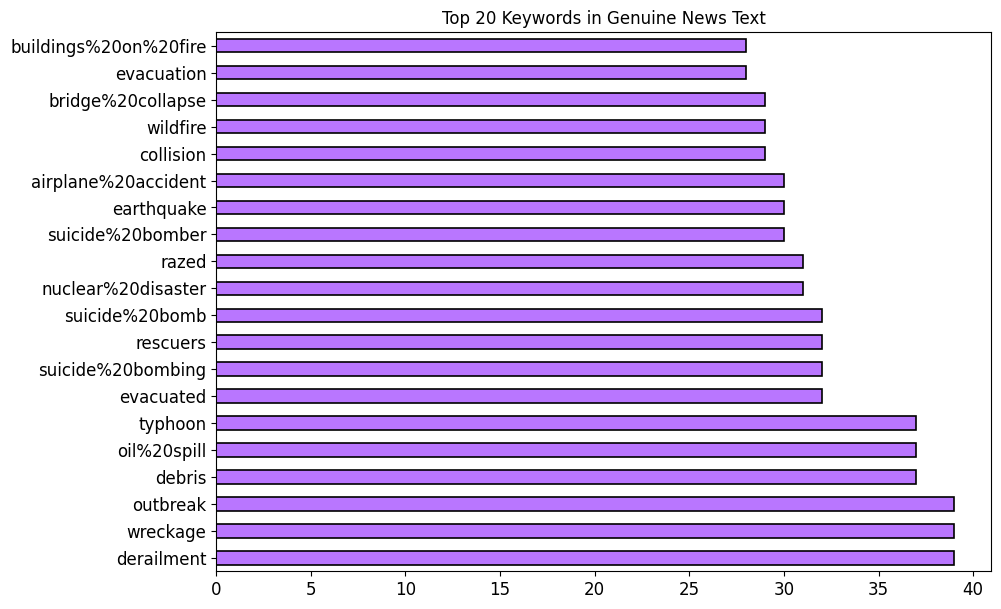

In [18]:
# Analysing Top 20 KeyWords in genuine news text .
plt.figure(figsize=(10,7))
train[train['target']==1]['keyword'].value_counts()[:20].plot(kind='barh', fontsize=12,
title='Top 20 Keywords in Genuine News Text', color='#B976FF',edgecolor='black', 
linewidth=1.2)
plt.show()

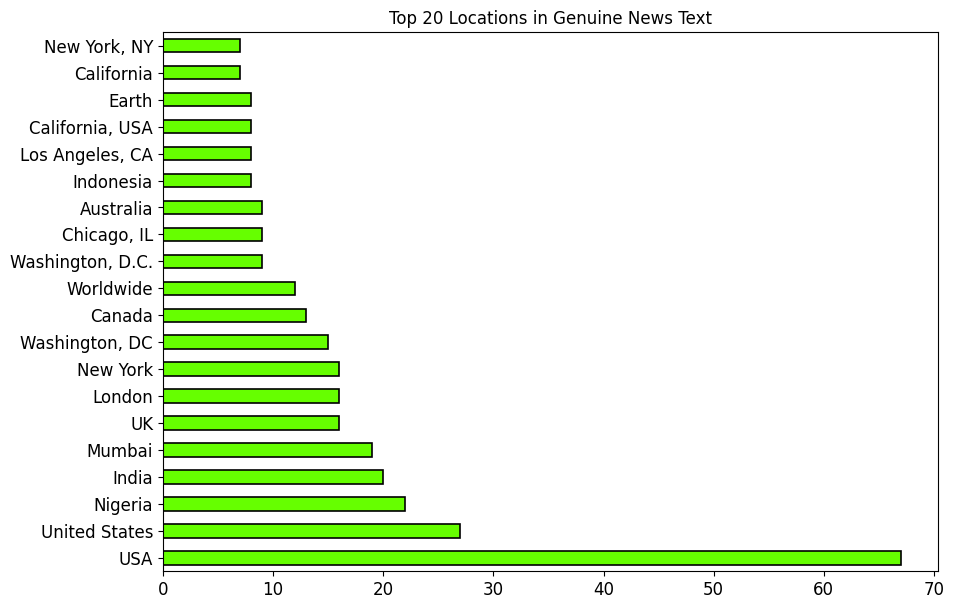

In [19]:
# Analysing Top 20 Locations in genuine news text.
plt.figure(figsize=(10,7))
train[train["target"]==1]["location"].value_counts()[:20].plot(kind='barh',fontsize=12, 
title='Top 20 Locations in Genuine News Text', color='#66ff00',edgecolor='black', linewidth=1.2)
plt.show()

Removal of URL's.
Removal of HTMl tags.
Removal of Emoji's.
Filtering out miscellaneous text.
Lowering the text.
Performing Stemming (in case of bag of words(bow) and tf-idf) and lemmatization for (LSTM).
Discarding words of length < 2.

In [20]:
# Seperating independent and dependent features
X = train.drop(columns=["target"],axis=1)
y = train["target"]

[1 1 1 ... 1 1 1]


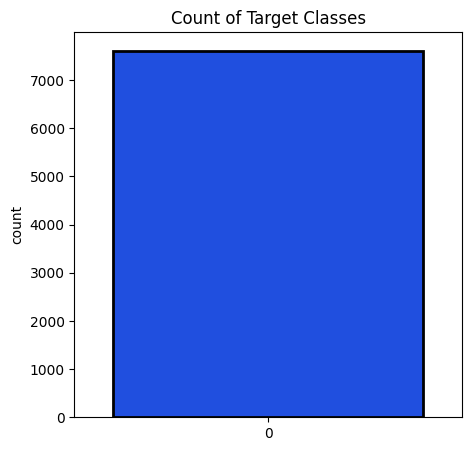

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
#print(X)
print(y)
plt.figure(figsize=(5,5))
plt.title("Count of Target Classes")
sns.countplot(y,linewidth=2, edgecolor='black')

plt.show()

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
# Perfoming data cleaning

messages_train = X.copy()
messages_test  = test.copy()

ps = PorterStemmer()


wl = WordNetLemmatizer()

def preprocess_data(data):
    '''
    Input: Data to be cleaned.
    Output: Cleaned Data.
    
    '''
    review =re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) #removal of url
    review =re.sub(r'<.*?>',' ',review) #removal of html tags
    review = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',review)
    review = re.sub('[^a-zA-Z]',' ',review) # filtering out miscellaneous text.
    review = review.lower() # Lowering all the words in text
    review = review.split()
    review = [ps.stem(words) for words in review if words not in stopwords.words('english')] #Stemming
    review = [i for i in review if len(i)>2] # Removal of words with length<2
    review = ' '.join(review)
    return review

train["Cleaned_text"] = train["text"].apply(preprocess_data)
test["Cleaned_text"] = test["text"].apply(preprocess_data)

Cleaned Data

In [24]:
train.head()

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


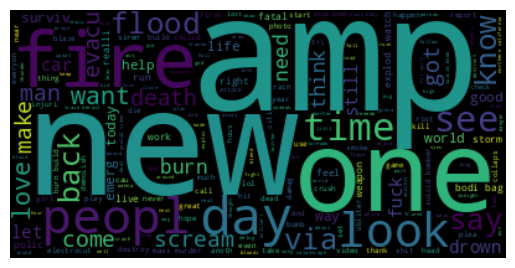

In [25]:
# Analysing common words using WordCloud 

wc = WordCloud(background_color='black')
wc.generate(' '.join(train['Cleaned_text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


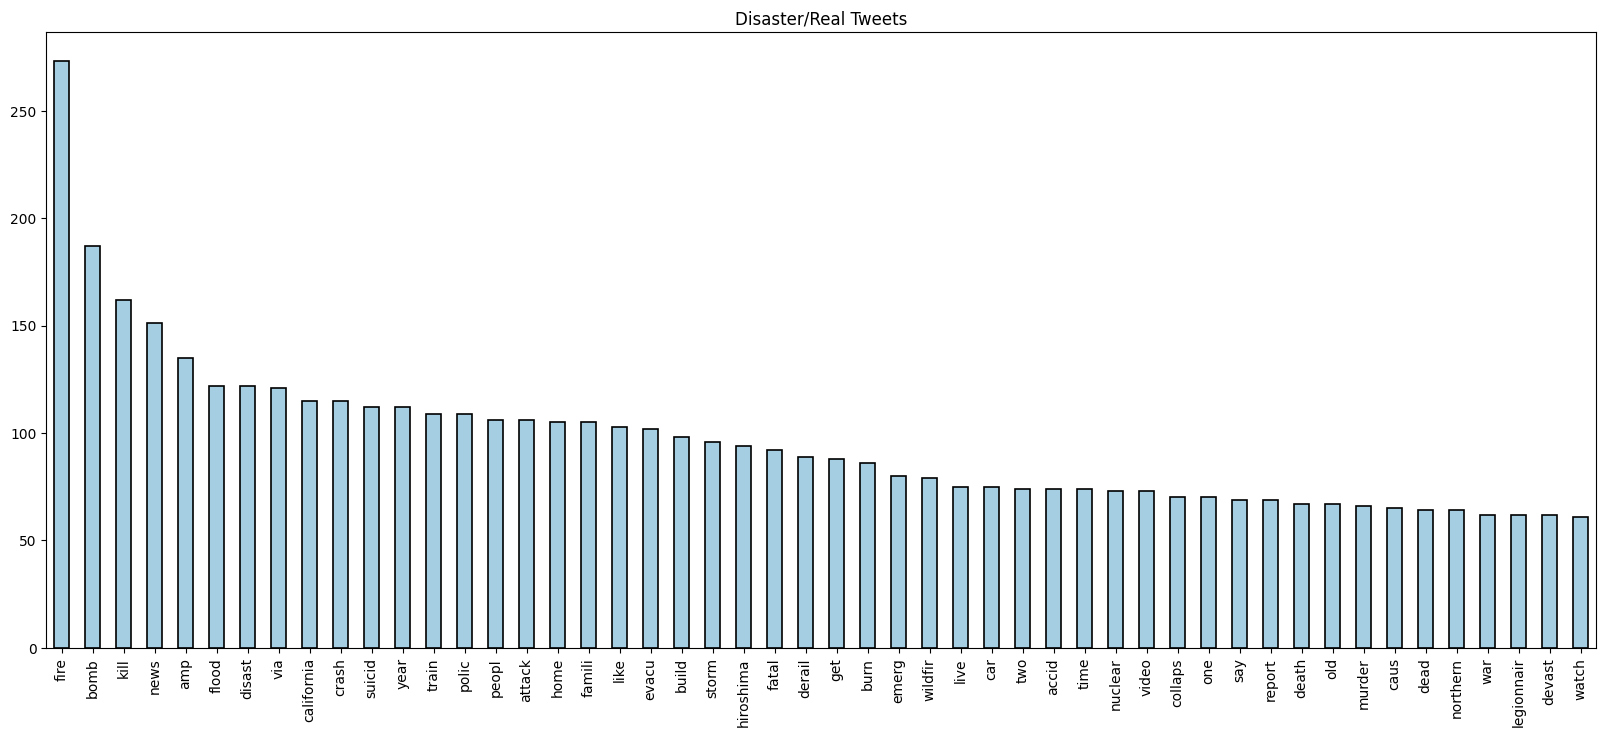

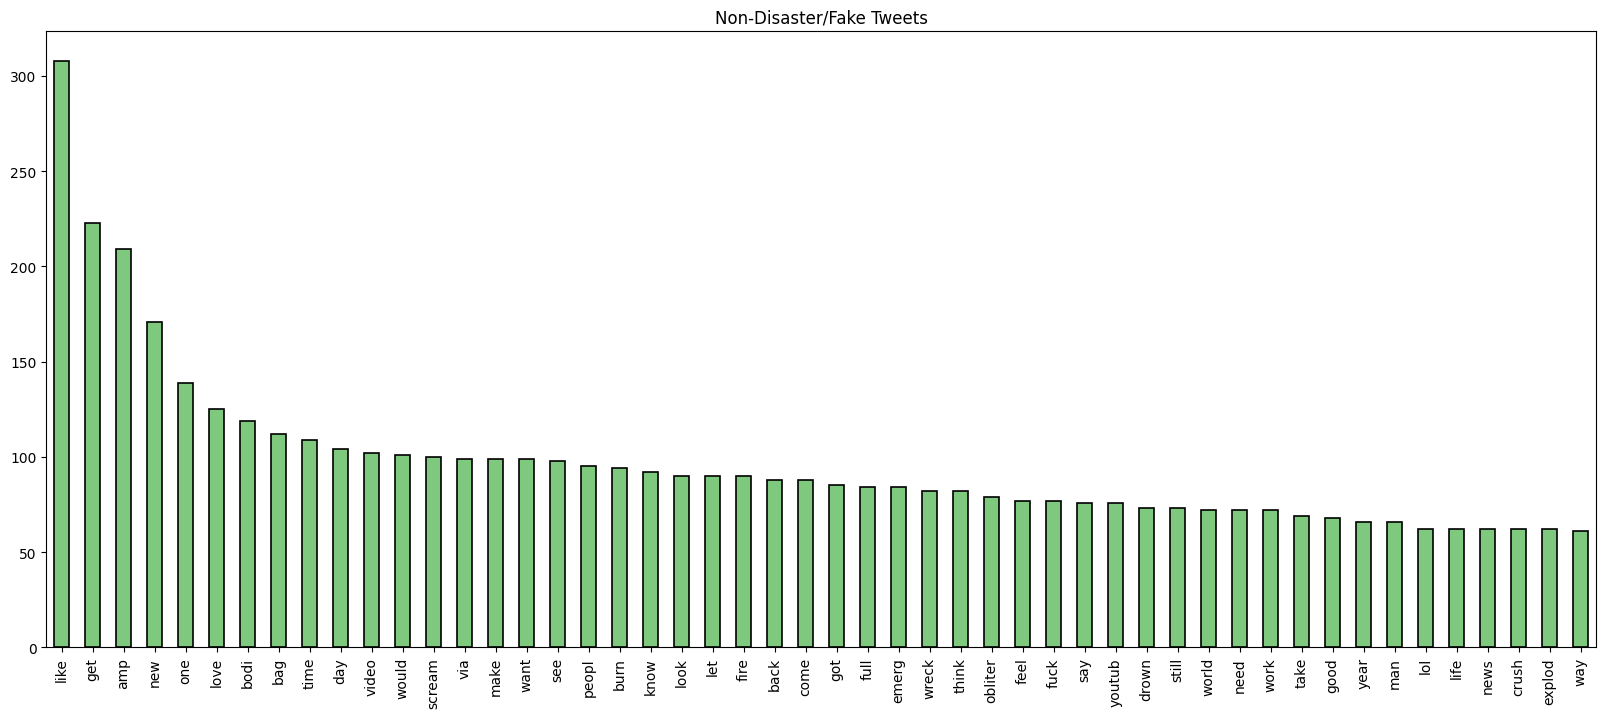

In [26]:
# Analysing top 50 words in training data

disaster_tweet = train[train.target==1]["Cleaned_text"]
non_disaster_tweet = train[train.target==0]["Cleaned_text"]

color = ['Paired','Accent']
splitedData = [disaster_tweet,non_disaster_tweet]
title = ["Disaster/Real Tweets", "Non-Disaster/Fake Tweets"]
for item in range(2):
    plt.figure(figsize=(20,8))
    plt.title(title[item],fontsize=12)
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(50).plot(kind='bar',
    fontsize=10,colormap=color[item],edgecolor='black', linewidth=1.2)
    plt.show()


In [27]:
common_words = ['via','like','build','get','would',
'one','two','feel','lol','fuck','take','way','may',
'first','latest','want','make','back','see','know',
'let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

train["Cleaned_text"] = train["Cleaned_text"].apply(text_cleaning)
test["Cleaned_text"] = test["Cleaned_text"].apply(text_cleaning)

In [28]:
train.head(1) # Much more cleaner

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak allah forgiv


transform the data in numerical format that is suitable for prediction by models using following techniques to transform the data.
BOW.
TF-IDF.
Word Embbedding using Glove Vectors.

analysing top N-grams using Bag Of Words

In [29]:
# Creating function for analysing top n grams

def top_ngrams(data,n,grams):
    '''
    Input:- Data: Input Data
            n   : Number of top n-words
            grams:Type of N-grams. 1-> Unigram  2-> Bigram  3->Trigram
            
    Output: Word Frequency of top  n words
    
    '''
    if grams == 1:
        count_vec = CountVectorizer(ngram_range=(1,1)).fit(data)
        bow = count_vec.transform(data)
        add_words = bow.sum(axis=0)
        word_freq = [(word, add_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
        word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
    elif grams == 2:
        count_vec = CountVectorizer(ngram_range=(2,2)).fit(data)
        bow = count_vec.transform(data)
        add_words = bow.sum(axis=0)
        word_freq = [(word,add_words[0,idx]) for word,idx in count_vec.vocabulary_.items()]
        word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
    elif grams == 3:
        count_vec = CountVectorizer(ngram_range=(3,3)).fit(data)
        bow = count_vec.transform(data)
        add_words = bow.sum(axis=0)
        word_freq = [(word,add_words[0,idx]) for word,idx in count_vec.vocabulary_.items()]
        word_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)

    return word_freq[:n]

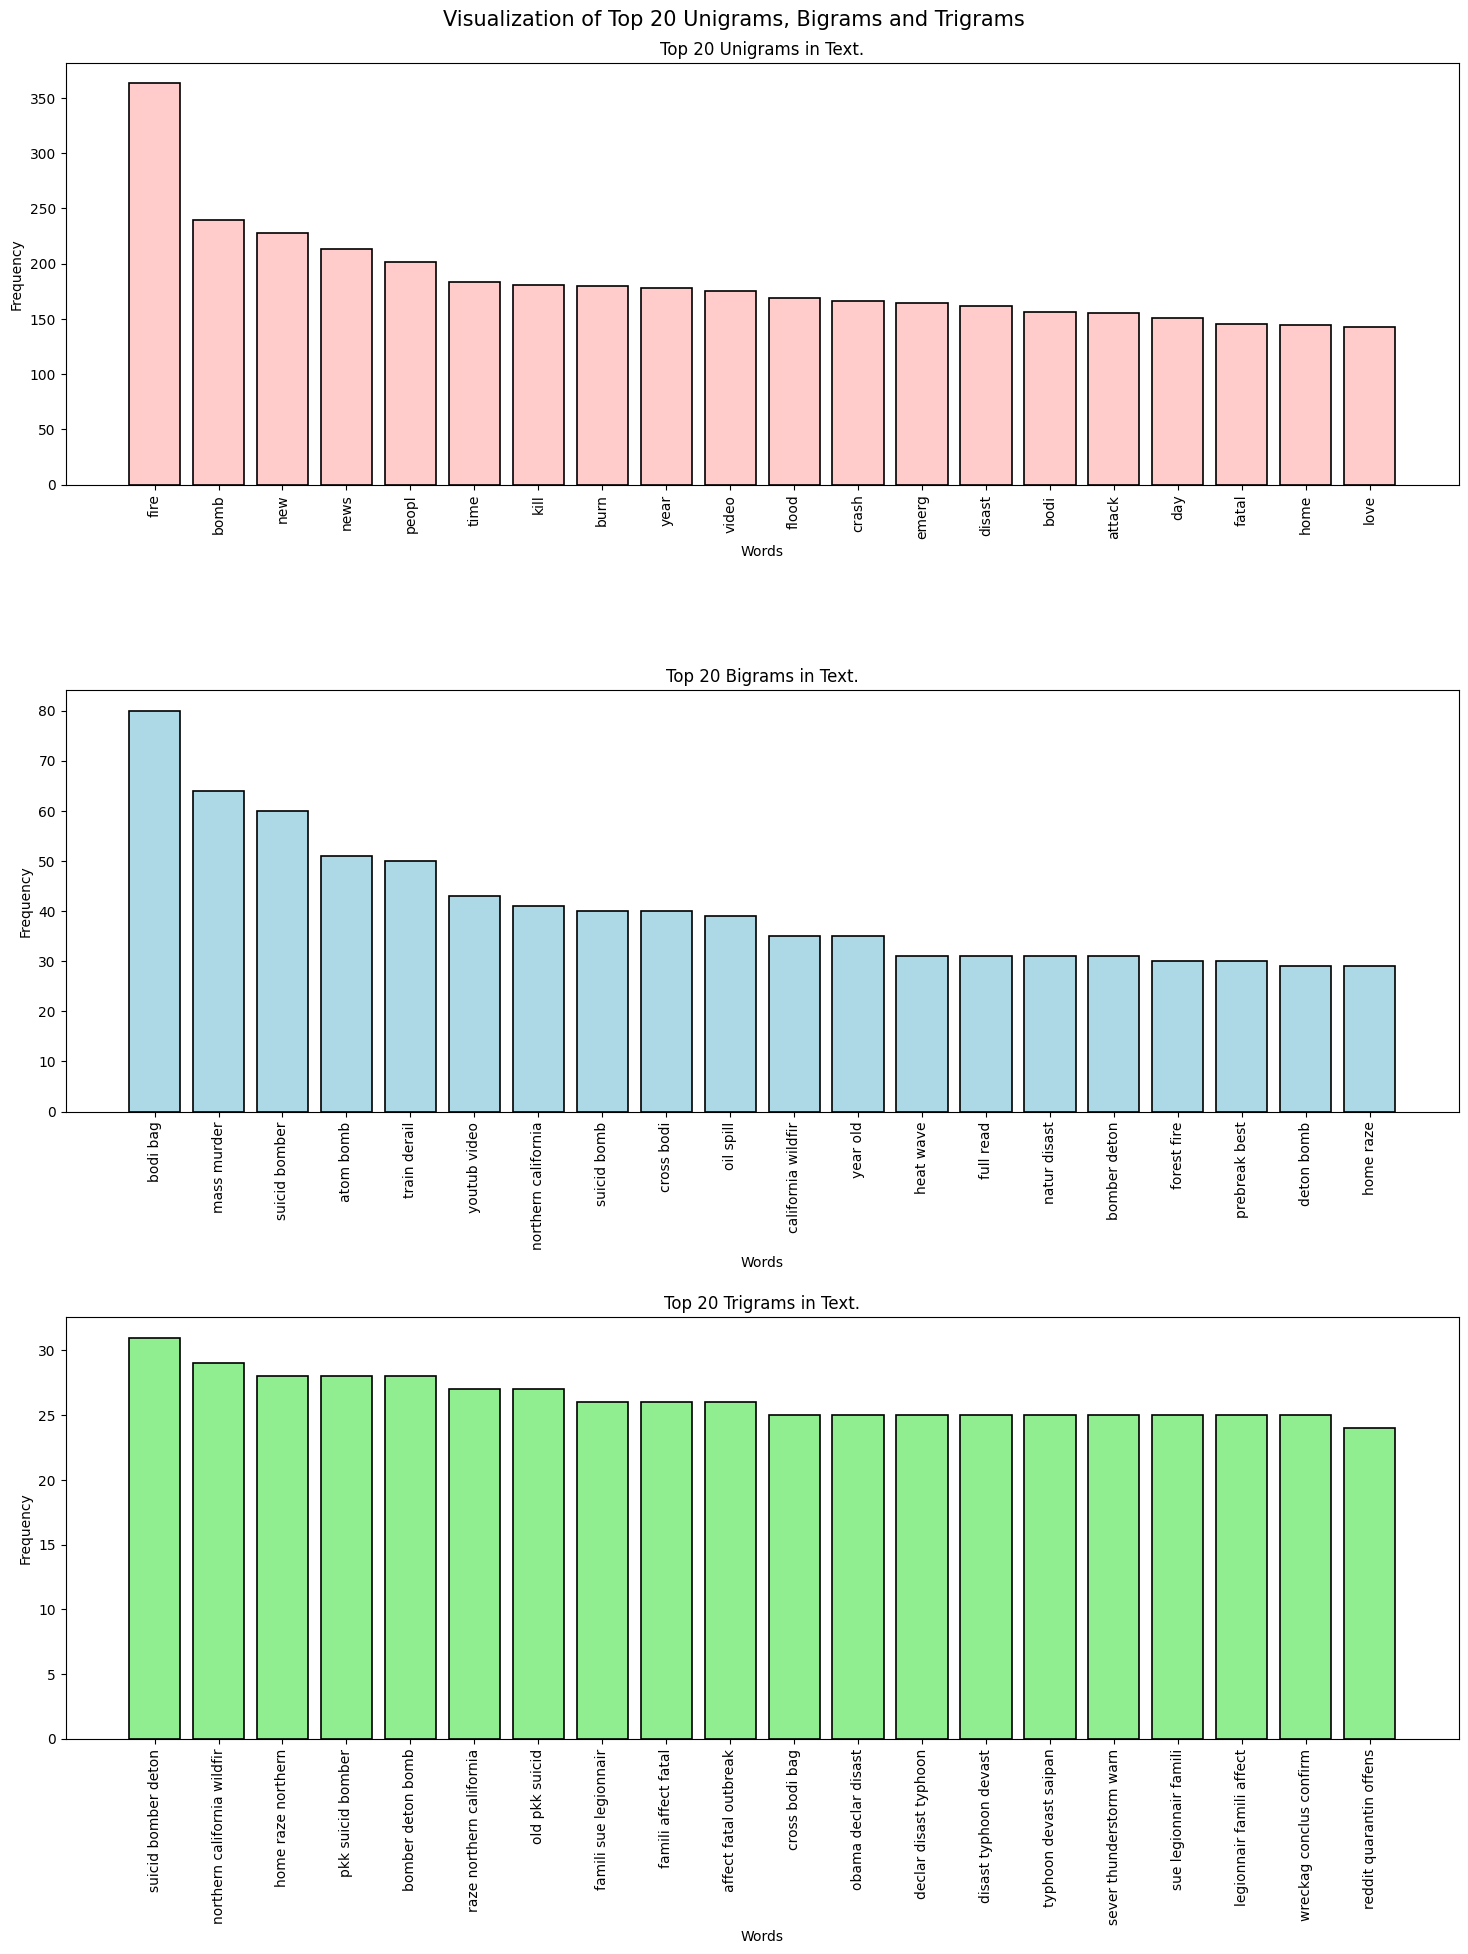

In [30]:
common_words_uni = top_ngrams(train["Cleaned_text"],20,1)
common_words_bi = top_ngrams(train["Cleaned_text"],20,2)
common_words_tri = top_ngrams(train["Cleaned_text"],20,3)
common_words_uni_df = pd.DataFrame(common_words_uni,columns=['word','freq'])
common_words_bi_df = pd.DataFrame(common_words_bi,columns=['word','freq'])
common_words_tri_df = pd.DataFrame(common_words_tri,columns=['word','freq'])
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,20))

ax1.bar(common_words_uni_df["word"],common_words_uni_df["freq"],
color="#FFCCCB",edgecolor='black', linewidth=1.2)
ax1.set_title("Top 20 Unigrams in Text.")
ax1.set_xlabel("Words")
ax1.set_ylabel("Frequency")
ax1.set_xticklabels(rotation=90,
labels=common_words_uni_df["word"],fontsize=10)    

ax2.bar(common_words_bi_df["word"],common_words_bi_df["freq"],
color="lightblue",edgecolor='black', linewidth=1.2)
ax2.set_title("Top 20 Bigrams in Text.")
ax2.set_xlabel("Words")
ax2.set_ylabel("Frequency")
ax2.set_xticklabels(rotation=90,
labels=common_words_bi_df["word"],fontsize=10)    

ax3.bar(common_words_tri_df["word"],common_words_tri_df["freq"]
,color="lightgreen",edgecolor='black', linewidth=1.2)
ax3.set_title("Top 20 Trigrams in Text.")
ax3.set_xlabel("Words")
ax3.set_ylabel("Frequency")
ax3.set_xticklabels(rotation=90,labels=common_words_tri_df["word"]
,fontsize=10) 
plt.suptitle("Visualization of Top 20 Unigrams, Bigrams and Trigrams",
fontsize="15")
plt.tight_layout(pad=1.85)
plt.show()

In [31]:
# Creating functions for using BOW,TF-IDF 

def encoding(train_data,test_data,bow,tf_idf):
    '''
    Input : Data to be encoded and choice of encoding.
    Output : Desired Encoding.
    
    '''
    if bow==True: 
        cv = CountVectorizer(ngram_range=(1, 1))
        cv_df_train = cv.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(cv_df_train,columns=cv.get_feature_names_out())
        cv_df_test = cv.transform(test_data).toarray()
        test_df = pd.DataFrame(cv_df_test,columns=cv.get_feature_names_out())
        
    elif tf_idf==True:
        
        tfidf = TfidfVectorizer(
            ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1)    
        tf_df_train = tfidf.fit_transform(train_data).toarray()
        train_df = pd.DataFrame(tf_df_train,columns=tfidf.get_feature_names_out())
        tf_df_test = tfidf.transform(test_data).toarray()
        test_df = pd.DataFrame(tf_df_test,columns=tfidf.get_feature_names_out())
        
    return train_df,test_df


x_final,x_test_final = encoding(train["Cleaned_text"],
test["Cleaned_text"],bow=True,tf_idf=False)
y_final = np.array(y) # Converting y to array

In [32]:
# Checking dimensions of training and testing data
x_final.shape,y_final.shape,x_test_final.shape

((7613, 12685), (7613,), (3263, 12685))

In [33]:
#Converting to list
text = train["Cleaned_text"].tolist()
text_test = test["Cleaned_text"].tolist()
text[:3] # Analysing first 3 sentence in train data

['deed reason earthquak allah forgiv',
 'forest fire near rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect']

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(text)

In [35]:
# Finding the vocab size
vocab_size = len(token.word_index)+1
print("The vocabulary size is : {}".format(vocab_size))

The vocabulary size is : 12686


In [36]:
# Encoding tokens in words to numerical formats
encoded_text = token.texts_to_sequences(text)
encoded_text_test = token.texts_to_sequences(text_test)
encoded_text[:2]


[[3490, 428, 180, 1283, 2783], [109, 1, 151, 5024, 5025, 980]]

In [37]:
#Considering 120 words
max_length = 120 # Considering top 120 tokens.
X = pad_sequences(encoded_text,maxlen=max_length,padding='post') 
# The above statement makes the sequence of same length.
X_test = pad_sequences(encoded_text_test,maxlen=max_length,padding='post')
X

array([[3490,  428,  180, ...,    0,    0,    0],
       [ 109,    1,  151, ...,    0,    0,    0],
       [1284,  479, 1568, ...,    0,    0,    0],
       ...,
       [ 578,  376, 1274, ...,    0,    0,    0],
       [  21,  140, 1875, ...,    0,    0,    0],
       [  19,  359,  121, ...,    0,    0,    0]], dtype=int32)

In [38]:
%%time
#declaring dict to store all the words as keys in the dictionary
# and their vector representations as values
glove_vectors = dict()

# Now, we will convert the words in glove vectors into key value pairs. 
# We have used glove representation of 200D. 


file = open('/content/drive/MyDrive/glove.6B.200d.txt',encoding="utf8")

for line in file:
    values = line.split()  # contains list of keys and their vectors
    word = values[0] # contains words
    vectors = np.asarray(values[1:]) # storing vectors
    glove_vectors[word] = vectors
    #storing the vector representation of the respective word in the dictionary above
file.close()

CPU times: user 20.5 s, sys: 2.06 s, total: 22.5 s
Wall time: 25.8 s


In [39]:
#Checking length of glove vectors
print("The maximum size of global vectors is : {}".format(len(glove_vectors)))

The maximum size of global vectors is : 400000


In [40]:
# Checking dimensions of Glove Vectors.
glove_vectors.get('you').shape

(200,)

In [41]:
# Now we are creating a matrix for the tokens which 
#we are having in our dataset and then storing their vector representation values 
#in the matrix if it matches with glove_vectors words 
#else print the misspelled words or words which are not present.

word_vector_matrix = np.zeros((vocab_size,200))  # size of the word matrix
for word,index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
    #else:
        #print(word)

In [42]:
print("The Size of Word Matrix is :{}".format(word_vector_matrix.shape))


The Size of Word Matrix is :(12686, 200)


In [43]:
# Dividing the data into training, validation and testing
from sklearn.model_selection import train_test_split
# for bow and tf-idf
# x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.1, random_state=42, stratify = y_final)
# X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
# x_test_final = x_test_final

#  for Word Embeddings
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)
X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
x_test_final = x_test_final

LOGISTIC REGRESSION

In [44]:
model_1 = LogisticRegression(C=1.0)
model_1.fit(X_train,Y_train)
pred_1 = model_1.predict(x_test)
cr1    = classification_report(y_test,pred_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.57      0.92      0.71       435
           1       0.44      0.09      0.14       327

    accuracy                           0.56       762
   macro avg       0.51      0.50      0.42       762
weighted avg       0.52      0.56      0.46       762



NAIVE BAYES

In [45]:
# model_2 = MultinomialNB(alpha=0.7)
# model_2.fit(X_train,Y_train)
# pred_2 = model_2.predict(x_test)
# cr2    = classification_report(y_test,pred_2)
# print(cr2)

 Decision Trees

In [46]:
# model_3 = DecisionTreeClassifier()
# model_3.fit(X_train,Y_train)
# pred_3 = model_3.predict(x_test)
# cr3    = classification_report(y_test,pred_3)
# print(cr3)

Random Forest (Untuned)

In [47]:
# model_4 = RandomForestClassifier()
# model_4.fit(X_train,Y_train)
# pred_4 = model_4.predict(x_test)
# cr4    = classification_report(y_test,pred_4)
# print(cr4)

XGBOOST

In [48]:
# model_5 = XGBClassifier()
# model_5.fit(X_train,Y_train)
# pred_5 = model_5.predict(x_test)
# cr5    = classification_report(y_test,pred_5)
# print(cr5)

CatBoost

In [49]:
# model_6 = CatBoostClassifier(iterations=100)
# model_6.fit(X_train,Y_train)
# pred_6 = model_6.predict(x_test)
# cr6    = classification_report(y_test,pred_6)
# print(cr6)

In [75]:
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers

embedding_feature_vector = 200 # Since we used glove vector embedding of dim 200.
model = Sequential()
model.add(Embedding(vocab_size,embedding_feature_vector,input_length=max_length,weights = [word_vector_matrix], trainable = False))
model.add(Dropout(0.35))
model.add(LSTM(200))
model.add(Dropout(0.35))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 200)          2537200   
                                                                 
 dropout_8 (Dropout)         (None, 120, 200)          0         
                                                                 
 lstm_4 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_9 (Dropout)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                6432      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,864,465
Trainable params: 327,265
Non-

In [76]:
from tensorflow.keras.callbacks import *
n_epoch = 20

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, 
                           mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='min')

In [77]:
# Training the model
history = model.fit(X_train,Y_train,validation_data=(x_valid,y_valid),
callbacks=[reduce_lr,early_stop],epochs=n_epoch,batch_size= 64)

Epoch 1/20
97/97 [==============================] - 6s 18ms/step - loss: 0.6876 - accuracy: 0.5703 - val_loss: 0.6810 - val_accuracy: 0.5700 - lr: 1.0000e-04
Epoch 2/20
97/97 [==============================] - 1s 12ms/step - loss: 0.5822 - accuracy: 0.7111 - val_loss: 0.5252 - val_accuracy: 0.7755 - lr: 1.0000e-04
Epoch 3/20
97/97 [==============================] - 1s 13ms/step - loss: 0.5302 - accuracy: 0.7620 - val_loss: 0.5184 - val_accuracy: 0.7770 - lr: 1.0000e-04
Epoch 4/20
97/97 [==============================] - 1s 12ms/step - loss: 0.5247 - accuracy: 0.7638 - val_loss: 0.4828 - val_accuracy: 0.7872 - lr: 1.0000e-04
Epoch 5/20
97/97 [==============================] - 1s 11ms/step - loss: 0.5158 - accuracy: 0.7676 - val_loss: 0.4756 - val_accuracy: 0.7799 - lr: 1.0000e-04
Epoch 6/20
97/97 [==============================] - 1s 11ms/step - loss: 0.5070 - accuracy: 0.7643 - val_loss: 0.4934 - val_accuracy: 0.7799 - lr: 1.0000e-04
Epoch 7/20
97/97 [==============================] - 

24/24 [==============================] - 1s 7ms/step


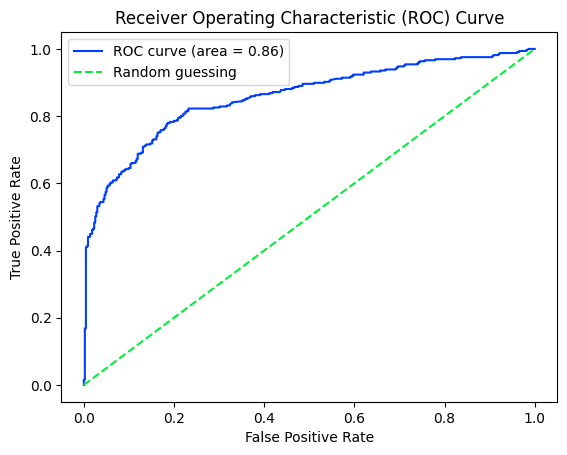

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train the model and store the training history
#history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), callbacks=[reduce_lr, early_stop], epochs=n_epoch, batch_size=64)

# Predict the probability scores of the test set
Y_pred_prob = model.predict(x_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob)
auc_score = roc_auc_score(y_test, Y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


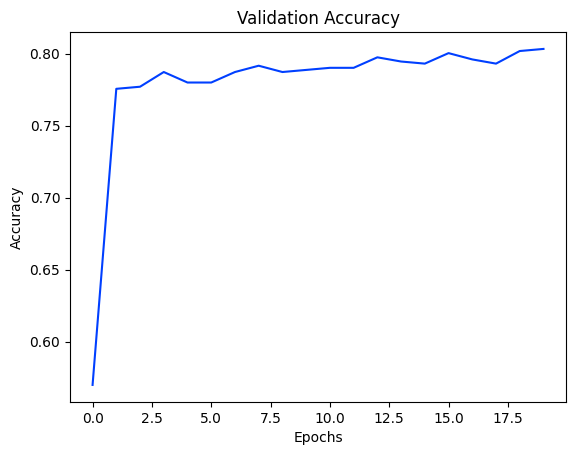

In [79]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [87]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
print(predictions)
#classes_x=np.argmax(predictions,axis=1)
cr = classification_report(y_test,predictions)
print(cr)

24/24 [==============================] - 0s 9ms/step
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [

In [81]:
#import pickle
#pickle.dump(model,open('/content/drive/MyDrive/lstm.pkl','wb'))
# # serialize to JSON
# json_file = model.to_json()
# with open('/content/drive/MyDrive/fake_json.json', "w") as file:
#    file.write(json_file)
# # serialize weights to HDF5
# model.save_weights('/content/drive/MyDrive/model.h5')

In [82]:
#with open('/content/drive/MyDrive/lstm.pkl', 'rb') as file:  
  #  Pickled_LSTM_Model = pickle.load(file)

#Pickled_LSTM_Model

In [93]:
x_test.shape

(762, 120)

In [ ]:
max_length = 120 # Considering top 120 tokens.
X = pad_sequences(encoded_text,maxlen=max_length,padding='post') 
# The above statement makes the sequence of same length.
X_test = pad_sequences(encoded_text_test,maxlen=max_length,padding='post')
X

In [111]:
# import numpy as np
MAX_SEQUENCE_LENGTH=120
# from keras.preprocessing.sequence import pad_sequences
# test_df = pd.read_csv('/content/drive/MyDrive/fake_train.csv')
# test_text = str(test_df.loc[random.randint(0, 899), 'text'])
# Tokenize the input text data
test_text = "Property losses from #California wildfire nearly double as week-old blaze rages: The fireÂ‰Ã›_ http://t.co/MsdizftZ2g"
test_sequence = token.texts_to_sequences([test_text])

# max_length = 120 # Considering top 120 tokens.
# X = pad_sequences(encoded_text,maxlen=max_length,padding='post') 
# # The above statement makes the sequence of same length.
# X_test = pad_sequences(encoded_text_test,maxlen=max_length,padding='post')
# X
# Pad the sequence with zeros to get a fixed length sequence
test_sequence = pad_sequences(test_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Reshape the sequence into a 3D tensor
#test_sequence = np.reshape(test_sequence, (test_sequence.shape[0], test_sequence.shape[1], 1))

# Make prediction using the model
prediction = model.predict(test_sequence)


1/1 [==============================] - 0s 24ms/step


In [112]:
# test_df = pd.read_csv('/content/drive/MyDrive/fake_test.csv')
# test_text = str(test_df.loc[random.randint(0, 899), 'text'])

# # Make prediction using the model
# prediction = model.predict(test_text)
# #prediction = prediction.astype("int32")[0]

print(f"Prediction: {prediction}, Text: {test_text}")

Prediction: [[0.6788732]], Text: Property losses from #California wildfire nearly double as week-old blaze rages: The fireÂ‰Ã›_ http://t.co/MsdizftZ2g


In [85]:
test_df = pd.read_csv('/content/drive/MyDrive/fake_test.csv')
test_df = test_df.text
import random

u_l =900
l_l = 0
n = random.randint(l_l, u_l)

test_text = str(test_df[n])
test_text



"@tomm3h You've been on Twitter since 2008?! Bloody hell. Veteran!"

In [86]:
prediction = model.predict(test_text> 0.5).astype("int32")

TypeError: ignored

In [ ]:
# # serialize to JSON
# json_file = model.to_json()
# with open("C:/Users/simra/Desktop/Group6/fake_json.json", "w") as file:
#    file.write(json_file)
# # serialize weights to HDF5
# model.save_weights("C:/Users/simra/Desktop/Group6/model.h5")

In [ ]:
# from keras.models import model_from_json
# # load json and create model
# file = open(json_file, 'r')
# model_json = file.read()
# file.close()
# loaded_model = model_from_json(model_json)
# # load weights
# loaded_model.load_weights('/content/drive/MyDrive/model.h5')

In [ ]:
# acc_1 = 0.78084
# acc_2 = 0.78740
# acc_3 = 0.76378
# acc_4 = 0.78609
# acc_5 = 0.80709
# acc_6 = 0.79659
# results = pd.DataFrame(["Logistic Regression",acc_1],["Naive Bayes",acc_2],["Decision Trees",acc_3],["Random Forest",acc_4],["XGBoost",acc_5],["CatBoost",acc_6],columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)
# results.style.background_gradient(cmap='Blues')